# 题目
一个定圆，圆内有两点，作圆内接直角三角形（假如有的话），使得两点分别在直角三角形的两条直角边上。

In [1]:
# %matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

point_num = 2
radius = 5.0

fig = plt.figure()
ax = fig.add_subplot(111)

cir = Circle(xy = (0, 0), radius=radius, edgecolor="b", facecolor="none", linewidth=1.0)
ax.add_patch(cir)

plt.axis("equal")
plt.grid()
# plt.show()

下面的两个 block 可以选取其中的一个执行，第一个 block 是生成一个一定可以画出直角三角形的两个点。
第二个 block 是随机生成两个点，不一定能画出直角三角形。

In [2]:
# 为了证明模型的正确型，这里提供一组可以检测到直角三角形的两点坐标:
# [2.5, 2.5]
# [-2.5, 2.5]
x = []
y = []

x.append(2.5)
y.append(2.5)
x.append(-2.5)
y.append(2.5)

# x[0], y[0] = 2.5, 2.5
# x[1], y[1] = -2.5, 2.5

for i in range(0, point_num):
    ax.plot(x[i], y[i], 'ro', ms=5.0)
    print([x[i], y[i]])   

[2.5, 2.5]
[-2.5, 2.5]


In [ ]:
# 为了防止重复运行此处内容，暂时注释掉

# import random 

# x = []
# y = []

# # 随机画两个点
# for i in range(0, point_num):
#     while True:
#         x.append(random.uniform(-radius, radius))
#         y.append(random.uniform(-radius, radius))
#         if (x[i]**2) + (y[i]**2) < (radius**2):
#             break
#     ax.plot(x[i], y[i], 'ro', ms=5.0)
#     print([x[i], y[i]])

# # plt.show()



In [3]:
import math 
import numpy as np

# 求两个点的中点，中点到圆的距离等于中点到这两个点的距离。
xm = np.sum(x)/2
ym = np.sum(y)/2
ds_2 = (xm-x[0])**2+(ym-y[0])**2

print([xm,ym])
print(ds_2)

ax.plot(xm, ym, 'yo', ms=3.0)

# plt.show()

[0.0, 2.5]
6.25


In [4]:
import decimal  

xs, ys = 0, 0;

def findVertex():
#     for theta in np.arange(-math.pi, math.pi, 0.000001):
#         xs = radius*math.sin(theta)
#         ys = radius*math.cos(theta)
    for xs in np.arange(-radius, radius+0.0001, 0.0001):
        xs = round(xs,4)   #  存在浮点数运算时的失真问题
        ys = (((radius**2)-(abs(xs)**2))**(1/2))
        ys = round(ys, 4)
        if ((xs-xm)**2+(ys-ym)**2) == ds_2 : 
            ax.plot(xs, ys, 'go', ms=5.0)
            print([xs,ys])
            return xs, ys
        elif (((xs-xm)**2+(-ys-ym)**2)**(1/2)) == ds_2 : 
            ax.plot(xs,-ys, 'go', ms=5.0)
            print([xs,-ys])
            return xs, ys      
    return False
        

xs, ys = findVertex()
if (xs == 0) and (ys == 0):
    print("error!")

[-0.0, 5.0]


In [5]:
from matplotlib.lines import Line2D

k1 = (ys-y[0])/(xs-x[0])
k1 = round(k1,4)
k2 = (ys-y[1])/(xs-x[1])
k2 = round(k2,4)

x1, y1 = 0, 0
x2, y2 = 0, 0

def calcVertex(xd, yd, k):
    for xi in np.arange(-radius, radius+0.01, 0.01):
        xi = round(xi, 2)
        if xi != xd and xi != xs:
            yi = (((radius**2)-(abs(xi)**2))**(1/2))
            yi = round(yi, 3)
          #  print([xi, yi])
          #  print((yd-yi)/(xd-xi))
            if (yd-yi)/(xd-xi) == k:
                ax.plot(xi, yi, 'go', ms=5.0)
                print([xi,yi])
                ax.plot([xs, xi],[ys, yi],linestyle='--', color="b")
                return xi, yi;
            elif (yd-(-yi))/(xd-xi) == k:
                ax.plot(xi, -yi, 'go', ms=5.0)
                print([xi,-yi])
                ax.plot([xs, xi],[ys, -yi],linestyle='--', color="b")
                return xi, yi;
    return False;

x1, y1 = calcVertex(x[0], y[0], k1)
x2, y2 = calcVertex(x[1], y[1], k2)

if (x1 != 0 or y1 != 0) and (x2 != 0 or y2 != 0):
    ax.plot([x1, x2],[y1, y2],linestyle='--', color="b")

[5.0, 0.0]
[-5.0, 0.0]


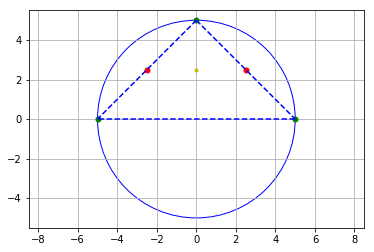

In [6]:
plt.show()